# Homework 2 - Data cleaning & Text representation 

### Importing useful libraries 

In [1]:
# Data manipulation
import numpy as np 
import pandas as pd 
from PIL import Image
import pandas_profiling

# Text manipulation
from string import punctuation
#from stop_words import get_stop_words
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# NLP Module
import nltk
from nltk import word_tokenize
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

## Downloading useful nltk packages 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Extra imports
import seaborn as sns
import matplotlib as plt
from collections import Counter
from itertools import chain 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Abderrahmane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/Abderrahmane/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Abderrahmane/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Hands on 1 - EDA, Cleaning, Tokenization & Feature Engineering

## a) Loading Data

In [2]:
# Path of folders where data are stored
DATA_PATH = "data/"
FIG_PATH = "fig/"

# Try to name your data / dataframe explicitly. 
file_name = "raw_scrapped_data.csv.gzip"
file_path = DATA_PATH + file_name

# Reading data
scrapped_data = pd.read_csv(file_path, compression='gzip')

In [3]:
# We take only a limited number of our reviews to increase speed / reduce process time
# You may want to start with low number of rows to see if your code works, and then increase this number to perform
# relevant and global analysis

# With sample, we specify a raw value of number of rows you want 
#scrapped_data_sample = scrapped_data.sample(30000)
# Or you can specify a fraction of initial rows

scrapped_data = scrapped_data.sample(frac=0.1)

## b) Exploratory Data Analysis

In [4]:
# Looking at a sample of the data
scrapped_data.head()

,id_resto,id_comment,resto,resto_url,rating,title,diner_date,rating_date,answer_text,reviewer_pseudo,reviewer_origin,reviewer_info_sup,other_ratings_category,other_ratings_value,url,content
38705,g1637597-d2454588,g1637597-d2454588-r321145181,The_Crooked_Billet_Harvester,/Restaurant_Review-g1637597-d2454588-Reviews-T...,2,An awful eating experience,October 2015,"October 23, 2015",NaN,1934185Kentcouple,"['Orpington, United Kingdom']","[['pencil-paper', '241'], ['thumbs-up-fill', '...","['Value', 'Service', 'Food']","['20', '20', '20']",https://www.tripadvisor.com/ShowUserReviews-g1...,"[""Harvester have recently changed their menu i..."
26764,g191301-d732780,g191301-d732780-r297622778,Caffe_Mamma,/Restaurant_Review-g191301-d732780-Reviews-Caf...,4,A Good choice for an informal family meal,August 2015,"August 10, 2015",NaN,OpalSurrey,"['Camberley, United Kingdom']","[['pencil-paper', '107'], ['thumbs-up-fill', '...","['Value', 'Service', 'Food']","['40', '40', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,['Decided to go here with our daughters and th...
42424,g186338-d1014397,g186338-d1014397-r442775011,Thai_Square_Trafalgar_Square,/Restaurant_Review-g186338-d1014397-Reviews-Th...,4,Yes fancy dining,November 2016,"December 7, 2016",['I would like to express my appreciation for ...,Indiana_Jonesse,"['San Francisco, California']","[['pencil-paper', '1757'], ['thumbs-up-fill', ...","['Value', 'Service', 'Food']","['40', '40', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,['They have various hours but M2F is Lunch hrs...
23246,g190763-d730933,g190763-d730933-r515835123,The_Minnow,/Restaurant_Review-g190763-d730933-Reviews-The...,4,"Good food, lovely venue",August 2017,"August 21, 2017",['Really appreciate the review Mike. Looking f...,Mike_Kwasniak,"['Ipswich, United Kingdom']","[['pencil-paper', '251'], ['thumbs-up-fill', '...","['Value', 'Service', 'Food']","['40', '40', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,"['We reached The Minnow from the river, and th..."
34456,g186416-d1674444,g186416-d1674444-r56110079,Rose_Crown,/Restaurant_Review-g186416-d1674444-Reviews-Ro...,5,Great time all round,NaN,"February 16, 2010",NaN,smudgerutd,['UK'],"[['pencil-paper', '1'], ['thumbs-up-fill', '1']]","['Value', 'Atmosphere', 'Service', 'Food']","['50', '50', '50', '50']",https://www.tripadvisor.com/ShowUserReviews-g1...,"[""Great food - friendly staff - Can't fault it..."


In [5]:
# Detecting missing values
scrapped_data.isna().sum()

id_resto                     0
id_comment                   0
resto                        0
resto_url                    0
rating                       0
title                        0
diner_date                 277
rating_date                  0
answer_text               3952
reviewer_pseudo              0
reviewer_origin              0
reviewer_info_sup            0
other_ratings_category       0
other_ratings_value          0
url                          0
content                      0
dtype: int64

In [6]:
# Generate profile report for quick data analysis
scrapped_data.profile_report()

#### Comments on dataframe profile report

**1. Overview & Missing values**
- We are working on a sample of **5000 observations** and we have **17 variables** in the dataframe
- The only two variables having missing values are **answer_text** and **diner_date**. We see that almost 80% of the reviews were left without an answer which is normal because restaurant owners can't answer all rewiews. Also around 5% of the rewiers forgot to mention their diner date
    
**2. Variables**

The most important variable here is **rating**, it has a mean of around 4 and we see that most reviewers issue high ratings of 5 or 4 as opposed to 1, 2 or 3 which can be explained by the fact that people's tendency to issue good reviews for the restaurants they like is higher than their tendency to issue bad reviews for the restaurants they don't like.

**3. Correlations**

We can't say much about correlations from profile report. No immediate correlation can be observed between rating and other features.

## c) Basic review cleaning, Tokenization & Feature engineering

###  - Cleaning

In [7]:
# Defining basic cleaning function

def basic_cleaning(series):
    # Remove punctuation
    new_series = series.str.replace('[^\w\s]','')
    # Strip trailing whitespace
    new_series = new_series.str.strip(" ")
    # Decapitalize letters
    new_series = new_series.apply(lambda x: str(x).lower())
    return new_series

scrapped_data['clean_title'] = basic_cleaning(scrapped_data['title'])
scrapped_data[['title','clean_title']].head() 

,title,clean_title
38705,An awful eating experience,an awful eating experience
26764,A Good choice for an informal family meal,a good choice for an informal family meal
42424,Yes fancy dining,yes fancy dining
23246,"Good food, lovely venue",good food lovely venue
34456,Great time all round,great time all round


### - Tokenization

In [8]:
# Defining tokenizing function

def tokenize_filter(sentence):
    # Define stopwords
    stop_words = set(stopwords.words('english')) 
    ## Add personalised stop words
    stop_words |= set(["london", "food", "drink", "restaurant"])
    # Filter the sentence
    word_tokens = word_tokenize(sentence) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    return (word_tokens, filtered_sentence) 

# Tokenizing the clean reviews without any stopwords 
scrapped_data["tokenized_title"] = scrapped_data["clean_title"].apply(lambda x: tokenize_filter(x)[1])
scrapped_data[["clean_title", "tokenized_title"]].head()

,clean_title,tokenized_title
38705,an awful eating experience,"[awful, eating, experience]"
26764,a good choice for an informal family meal,"[good, choice, informal, family, meal]"
42424,yes fancy dining,"[yes, fancy, dining]"
23246,good food lovely venue,"[good, lovely, venue]"
34456,great time all round,"[great, time, round]"


### - Feature Engineering

#### 1) Datetime format

In [9]:
scrapped_data["diner_date"] = pd.to_datetime(scrapped_data["diner_date"])
scrapped_data["rating_date"] = pd.to_datetime(scrapped_data["rating_date"])

#### 2) Review length

In [10]:
scrapped_data["title_len"] = scrapped_data.apply(lambda x: len(x["title"]), axis=1)

In [11]:
scrapped_data['len_review'] = scrapped_data['content'].apply(lambda x : len(x))

#### 3) Weekday

In [12]:
scrapped_data['day_of_week'] = scrapped_data.apply(lambda x: x["rating_date"].day, axis=1)

#### 4) Difference in days between rating and diner dates

In [13]:
scrapped_data["diner_rating_diff"] = scrapped_data.apply(lambda x: x["rating_date"] - x["diner_date"], axis=1)

In [14]:
scrapped_data.head()

,id_resto,id_comment,resto,resto_url,rating,title,diner_date,rating_date,answer_text,reviewer_pseudo,...,other_ratings_category,other_ratings_value,url,content,clean_title,tokenized_title,title_len,len_review,day_of_week,diner_rating_diff
38705,g1637597-d2454588,g1637597-d2454588-r321145181,The_Crooked_Billet_Harvester,/Restaurant_Review-g1637597-d2454588-Reviews-T...,2,An awful eating experience,2015-10-01,2015-10-23,NaN,1934185Kentcouple,...,"['Value', 'Service', 'Food']","['20', '20', '20']",https://www.tripadvisor.com/ShowUserReviews-g1...,"[""Harvester have recently changed their menu i...",an awful eating experience,"[awful, eating, experience]",26,910,23,22 days
26764,g191301-d732780,g191301-d732780-r297622778,Caffe_Mamma,/Restaurant_Review-g191301-d732780-Reviews-Caf...,4,A Good choice for an informal family meal,2015-08-01,2015-08-10,NaN,OpalSurrey,...,"['Value', 'Service', 'Food']","['40', '40', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,['Decided to go here with our daughters and th...,a good choice for an informal family meal,"[good, choice, informal, family, meal]",41,492,10,9 days
42424,g186338-d1014397,g186338-d1014397-r442775011,Thai_Square_Trafalgar_Square,/Restaurant_Review-g186338-d1014397-Reviews-Th...,4,Yes fancy dining,2016-11-01,2016-12-07,['I would like to express my appreciation for ...,Indiana_Jonesse,...,"['Value', 'Service', 'Food']","['40', '40', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,['They have various hours but M2F is Lunch hrs...,yes fancy dining,"[yes, fancy, dining]",16,960,7,36 days
23246,g190763-d730933,g190763-d730933-r515835123,The_Minnow,/Restaurant_Review-g190763-d730933-Reviews-The...,4,"Good food, lovely venue",2017-08-01,2017-08-21,['Really appreciate the review Mike. Looking f...,Mike_Kwasniak,...,"['Value', 'Service', 'Food']","['40', '40', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,"['We reached The Minnow from the river, and th...",good food lovely venue,"[good, lovely, venue]",23,526,21,20 days
34456,g186416-d1674444,g186416-d1674444-r56110079,Rose_Crown,/Restaurant_Review-g186416-d1674444-Reviews-Ro...,5,Great time all round,NaT,2010-02-16,NaN,smudgerutd,...,"['Value', 'Atmosphere', 'Service', 'Food']","['50', '50', '50', '50']",https://www.tripadvisor.com/ShowUserReviews-g1...,"[""Great food - friendly staff - Can't fault it...",great time all round,"[great, time, round]",20,55,16,NaT


## d) Some visualisations

#### 1) Most common words

In [15]:
reviews = scrapped_data["clean_title"].str.split()
most_frequent_words = Counter(chain(*reviews)).most_common()
most_frequent_words[:10]

[('food', 949),
 ('great', 753),
 ('and', 577),
 ('good', 524),
 ('a', 518),
 ('service', 478),
 ('the', 421),
 ('in', 313),
 ('excellent', 276),
 ('for', 263)]

#### 2) Worldcloud for the titles of our reviews

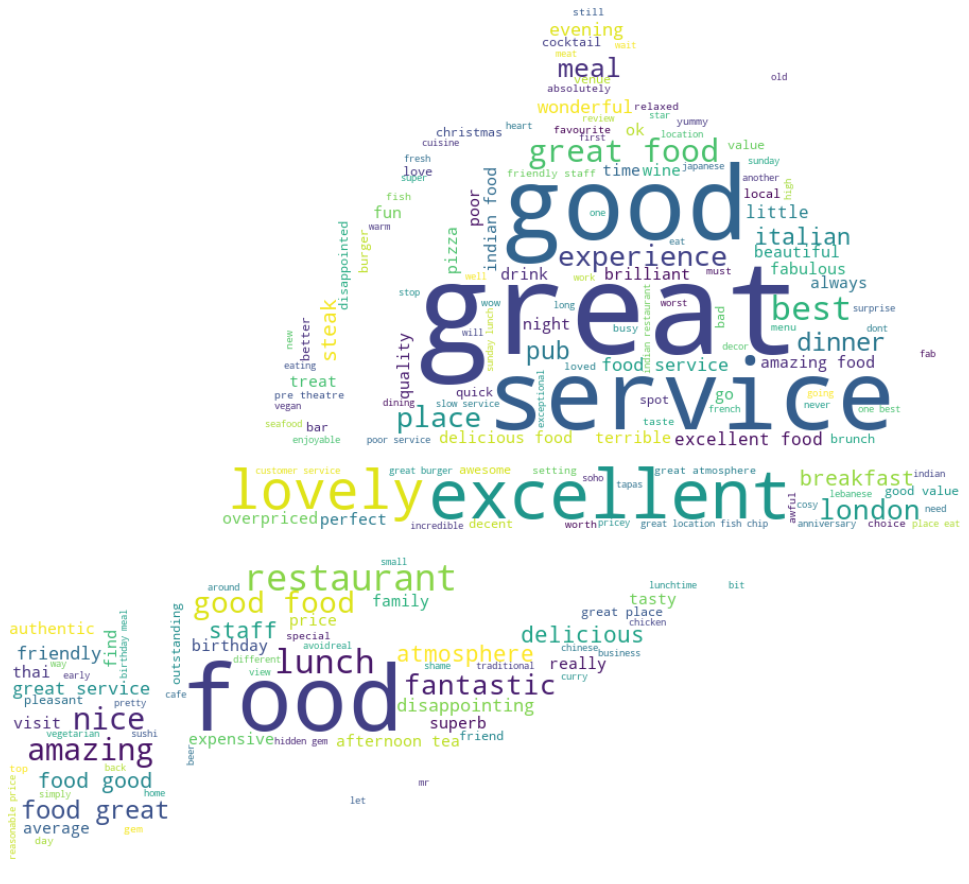

In [16]:
# Define masks for wordcloud
image = Image.open(FIG_PATH + "plate.jpg")
plate_mask = np.array(image)

image = Image.open(FIG_PATH + "waiter.jpg")
waiter_mask = np.array(image)

# Function to generate word cloud from corpusfrom_corpus_to_word_cloud(scrapped_data['clean_title'])
def from_corpus_to_word_cloud(text_column, mask):
    text_column = scrapped_data['clean_title']
    text_column = text_column.to_string()
    # Generate a word cloud image
    wc = WordCloud(background_color="white",min_font_size=7, mask=mask)
    # Setting max font size to 50 to display more words
    wordcloud = wc.generate(text_column)
    from matplotlib.pyplot import figure
    figure(num=None, figsize=(20, 16))
    #plt.pyplot.figure()
    plt.pyplot.imshow(wordcloud, interpolation="bilinear")
    plt.pyplot.axis("off")
    plt.pyplot.show() 
    return wordcloud



from_corpus_to_word_cloud(scrapped_data['clean_title'], waiter_mask)

#### 3) Review length association with ratings

####  Review Length Distribution

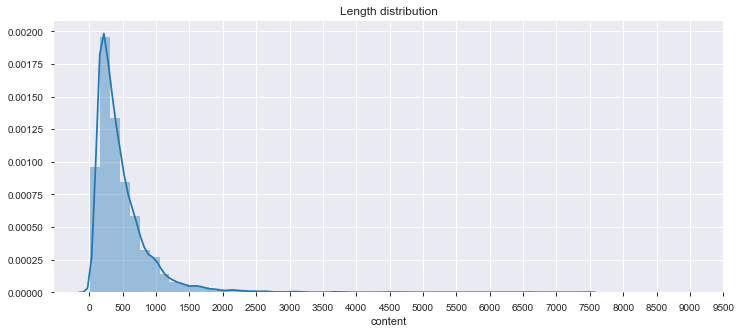

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot density with histogram
x = plt.figure(figsize=(12,5))
sns.distplot(scrapped_data['content'].apply(len))
plt.title('Length distribution')
plt.xticks(range(0,10000,500))
plt.show()

####  Average review length per rating:
Let's check the mean review length for each of the five possible ratings:

In [19]:
scrapped_data.groupby("rating").mean()["len_review"]

rating
1    710.063158
2    695.606349
3    577.485185
4    468.177998
5    409.166601
Name: len_review, dtype: float64

#### Percentage of each rating per length review interval

In [184]:
# This method creates intervals for the length of the review
def review_size(len_review):
    if len_review < 100 :
        return '0-100'
    elif ((len_review >=100) and (len_review<500)):
        return '100-500'
    elif ((len_review >=500) and (len_review<1000)):
        return '500-1000'
    elif ((len_review >=1000) and (len_review<5000)):
        return '1000-5000'
    elif ((len_review >=5000) and (len_review<10000)):
        return '5000-10000'
    elif len_review >=10000 :
          return '>10000'
          
scrapped_data['len_review_interval'] = scrapped_data['len_review'].apply(lambda x : review_size(x) )
rating_per_length = scrapped_data[['len_review_interval', 'rating', 'content']]\
                        .groupby(by=['len_review_interval', 'rating'], as_index=False).count()

#Fill in 0 when the len_review_interval has no reviews for a certain rating
for size in rating_per_length['len_review_interval'].unique():
    for i in range(1, 6):
        length = len(rating_per_length)
        if len(rating_per_length[(rating_per_length['len_review_interval'] == size) & (rating_per_length['rating']==i)])==0:
            rating_per_length.loc[length+1] = [size, i, 0]

In [185]:
rating_1 = list(rating_per_length[rating_per_length['rating']==1].sort_values(by=['len_review_interval'])['content'])
rating_2 = list(rating_per_length[rating_per_length['rating']==2].sort_values(by=['len_review_interval'])['content'])
rating_3 = list(rating_per_length[rating_per_length['rating']==3].sort_values(by=['len_review_interval'])['content'])
rating_4 = list(rating_per_length[rating_per_length['rating']==4].sort_values(by=['len_review_interval'])['content'])
rating_5 = list(rating_per_length[rating_per_length['rating']==5].sort_values(by=['len_review_interval'])['content'])

df_ratings = pd.DataFrame(list(zip(rating_1, rating_2, rating_3,rating_4, rating_5)), 
                  columns =['rating_1', 'rating_2', 'rating_3', 'rating_4','rating_5']) 

# From raw value to percentage
totals = [i+j+k+l+m for i,j,k, l,m in zip( df_ratings['rating_1'], df_ratings['rating_2'], df_ratings['rating_3'], df_ratings['rating_4'],df_ratings['rating_5'])]
rate_1 = [i / j * 100 for i,j in zip(df_ratings['rating_1'], totals)]
rate_2 = [i / j * 100 for i,j in zip(df_ratings['rating_2'], totals)]
rate_3 = [i / j * 100 for i,j in zip(df_ratings['rating_3'], totals)]
rate_4 = [i / j * 100 for i,j in zip(df_ratings['rating_4'], totals)]
rate_5 = [i / j * 100 for i,j in zip(df_ratings['rating_5'], totals)]

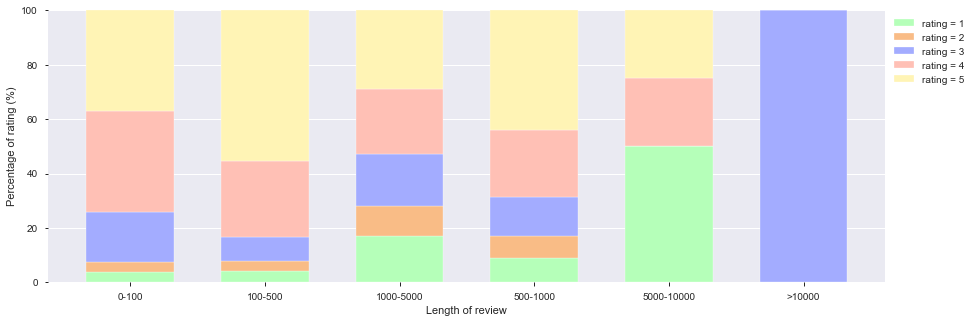

In [186]:
# plot
plt.figure(figsize=(15,5))
r = list(range(0, len(rating_1)))
barWidth = 0.65
names = rating_per_length['len_review_interval'].unique()
plt.bar(r, rate_1 , color='#b5ffb9', edgecolor='white', width=barWidth, label='rating = 1')
plt.bar(r, rate_2, bottom=rate_1, color='#f9bc86', edgecolor='white', width=barWidth, label='rating = 2')
plt.bar(r, rate_3, bottom=[i+j for i,j in zip(rate_1, rate_2)], color='#a3acff', edgecolor='white', width=barWidth, label='rating = 3')
plt.bar(r, rate_4, bottom=[i+j+k for i,j,k in zip(rate_1, rate_2, rate_3)], color='#ffc0b5', edgecolor='white', width=barWidth, label='rating = 4')
plt.bar(r, rate_5, bottom=[i+j+k+l for i,j,k,l in zip(rate_1, rate_2, rate_3, rate_4)], color='#fff4b5', edgecolor='white', width=barWidth, label='rating = 5')


# Custom x and y axis
plt.xticks(r, names)
plt.xlabel("Length of review")
plt.ylabel("Percentage of rating (%)")


# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)


plt.show()


#### Comment

Observing the mean review length by rating and the plot of the percentage of each rating per length review interval, we see that the smaller the rating the longer the review. This can be explained by the fact that the lower the rating, the more the reviewer feels he should explain why he gave such a bad rating, resulting in longer reviews.

## e) Work on reviews - apply same pipeline used for titles

In [20]:
reviews = scrapped_data["content"]
scrapped_data["clean_content"] = basic_cleaning(reviews)
scrapped_data["tokenized_content"] = scrapped_data["clean_content"].apply(lambda x: tokenize_filter(x)[1])

# Useful for later
tokenized_reviews = scrapped_data["tokenized_content"]
clean_reviews = scrapped_data["clean_content"]

scrapped_data[["content", "clean_content", "tokenized_content"]].head()

,content,clean_content,tokenized_content
38705,"[""Harvester have recently changed their menu i...",harvester have recently changed their menu it ...,"[harvester, recently, changed, menu, less, app..."
26764,['Decided to go here with our daughters and th...,decided to go here with our daughters and thei...,"[decided, go, daughters, respective, boyfriend..."
42424,['They have various hours but M2F is Lunch hrs...,they have various hours but m2f is lunch hrs 1...,"[various, hours, m2f, lunch, hrs, 123, dinner,..."
23246,"['We reached The Minnow from the river, and th...",we reached the minnow from the river and the r...,"[reached, minnow, river, couple, hundred, yard..."
34456,"[""Great food - friendly staff - Can't fault it...",great food friendly staff cant fault it at all,"[great, friendly, staff, cant, fault]"


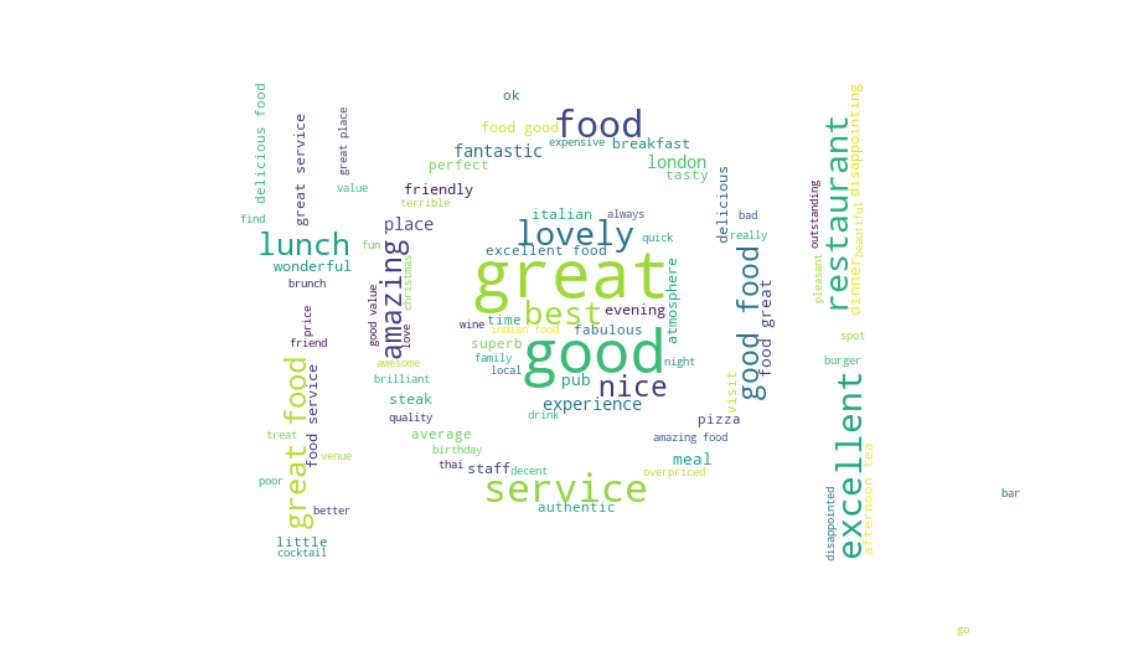

In [21]:
from_corpus_to_word_cloud(scrapped_data['clean_content'], plate_mask)

# Hands On 2 - Stemming and Lemmatization

## a) Stemming

    Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.

In [226]:
# Function tho stem tokens using Porter Stemmer
def stem_review(tokens):
    porter = PorterStemmer()
    return tokens.apply(lambda x: [porter.stem(x[i]) for i in range(len(x))])

In [227]:
stemmed_reviews = stem_review(tokenized_reviews)
stemmed_reviews. head()

31930    [first, thought, say, anyon, want, afternoon, ...
20687    [excel, qualiti, beef, carpacci, fillet, steak...
15352    [fault, experi, circu, went, offic, christma, ...
38196    [unpretenti, part, brentford, gem, famili, fun...
12276    [went, pub, late, sunday, lunch, busi, footbal...
Name: tokenized_content, dtype: object

## b) Lemmatization

    Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

In [228]:
# Function tho lemmatize tokens using WordNetLemmatizer
def lemmatize_review(tokens):
    lemmatizer = WordNetLemmatizer()
    return tokens.apply(lambda x: [lemmatizer.lemmatize(x[i]) for i in range(len(x))])

In [229]:
lemmatized_reviews = lemmatize_review(tokenized_reviews)
lemmatized_reviews.head()

31930    [first, thought, say, anyone, want, afternoon,...
20687    [excellent, quality, beef, carpacci, fillet, s...
15352    [fault, experience, circus, went, office, chri...
38196    [unpretentious, part, brentford, gem, family, ...
12276    [went, pub, late, sunday, lunch, busy, footbal...
Name: tokenized_content, dtype: object

# Hands On 3

## Bag of Words

    The BOW model only considers if a known word occurs in a document or not. It does not care about meaning, context, and order in which they appear.
    This gives the insight that similar documents will have word counts similar to each other. In other words, the more similar the words in two documents, the more similar the documents can be.

In [230]:
# Let's first take a look at the most frequent words
word_frequency = Counter(chain(*tokenized_reviews)).most_common()
word_frequency

[('good', 2904),
 ('service', 2545),
 ('great', 2006),
 ('staff', 1778),
 ('place', 1483),
 ('would', 1434),
 ('us', 1311),
 ('menu', 1235),
 ('really', 1163),
 ('one', 1142),
 ('time', 1126),
 ('friendly', 1064),
 ('nice', 1016),
 ('back', 1004),
 ('table', 984),
 ('well', 910),
 ('go', 898),
 ('excellent', 887),
 ('meal', 866),
 ('lovely', 856),
 ('like', 815),
 ('delicious', 802),
 ('went', 750),
 ('wine', 738),
 ('also', 737),
 ('get', 701),
 ('atmosphere', 682),
 ('lunch', 682),
 ('recommend', 659),
 ('experience', 658),
 ('visit', 645),
 ('came', 626),
 ('definitely', 624),
 ('best', 604),
 ('bar', 594),
 ('ordered', 587),
 ('could', 574),
 ('always', 556),
 ('drinks', 540),
 ('amazing', 538),
 ('evening', 535),
 ('even', 523),
 ('tasty', 517),
 ('first', 511),
 ('dishes', 511),
 ('two', 510),
 ('little', 507),
 ('didnt', 502),
 ('busy', 498),
 ('dinner', 495),
 ('much', 488),
 ('quite', 484),
 ('bit', 482),
 ('night', 476),
 ('eat', 471),
 ('quality', 462),
 ('small', 461),
 ('o

In [231]:
# BOW using scikit-learn CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word", stop_words = None, max_features = 5000) 
transformed_content = vectorizer.fit_transform(clean_reviews)

In [232]:
# Vocabulary of the BOW vectorizer
print(vectorizer.vocabulary_)

{'my': 2870, 'first': 1771, 'thoughts': 4475, 'are': 328, 'to': 4512, 'say': 3807, 'that': 4437, 'if': 2244, 'anyone': 282, 'wants': 4799, 'the': 4439, 'afternoon': 193, 'tea': 4396, 'experience': 1641, 'then': 4449, 'go': 1970, 'ritz': 3697, 'claridges': 959, 'browns': 674, 'or': 3042, 'savoy': 3805, 'not': 2958, 'harrods': 2084, 'this': 4467, 'whole': 4888, 'was': 4810, 'overpriced': 3086, 'at': 369, 'for': 1827, 'how': 2213, 'can': 752, 'be': 468, 'justified': 2410, 'restaurant': 3653, 'is': 2350, 'private': 3400, 'quiet': 3486, 'our': 3062, 'seats': 3851, 'were': 4858, 'and': 264, 'customers': 1227, 'come': 1018, 'out': 3065, 'of': 2996, 'walked': 4785, 'through': 4479, 'it': 2358, 'felt': 1733, 'like': 2534, 'you': 4981, 'in': 2271, 'corridor': 1132, 'such': 4277, 'bad': 420, 'design': 1328, 'service': 3894, 'very': 4738, 'poor': 3314, 'we': 4830, 'waited': 4773, 'when': 4872, 'they': 4454, 'came': 749, 'nice': 2926, 'but': 716, 'all': 219, 'time': 4499, 'annoying': 272, 'had': 20

In [233]:
# Transformed content using BOW vectorizer
print(transformed_content.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## TFIDF

- One issue with simple counts is that some words like “the” will appear many times and their large counts will not be very meaningful in the encoded vectors.

- An alternative is to calculate word frequencies, and by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

   **Term Frequency:** This summarizes how often a given word appears within a document.
   
   **Inverse Document Frequency:** This downscales words that appear a lot across documents

#### a) Built-in TFIDF

In [234]:
# TF-IDF using TfidfVectorizer from scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(clean_reviews)
# encode document
vector = vectorizer.transform(clean_reviews)

In [235]:
# Vocab of the vectorizer
print(vectorizer.vocabulary_)

{'my': 9630, 'first': 5819, 'thoughts': 14686, 'are': 1239, 'to': 14810, 'say': 12654, 'that': 14586, 'if': 7441, 'anyone': 1129, 'wants': 15795, 'the': 14591, 'afternoon': 788, 'tea': 14451, 'experience': 5452, 'then': 14616, 'go': 6533, 'ritz': 12310, 'claridges': 3263, 'browns': 2408, 'or': 10180, 'savoy': 12649, 'not': 9910, 'harrods': 6954, 'this': 14668, 'whole': 16023, 'was': 15833, 'overpriced': 10324, 'at': 1378, '59': 418, 'for': 6016, 'how': 7330, 'can': 2655, 'be': 1750, 'justified': 8021, 'restaurant': 12153, 'is': 7816, 'private': 11350, 'quiet': 11637, 'our': 10241, 'seats': 12782, 'were': 15951, 'backing': 1553, 'lifts': 8479, 'and': 1049, 'customers': 4093, 'come': 3461, 'out': 10245, 'of': 10045, 'walked': 15764, 'through': 14705, 'it': 7834, 'felt': 5705, 'like': 8491, 'you': 16286, 'in': 7519, 'corridor': 3805, 'such': 14079, 'bad': 1566, 'design': 4415, 'service': 12892, 'very': 15595, 'poor': 11079, 'we': 15872, 'waited': 15731, 'when': 15982, 'they': 14637, 'came

In [236]:
print(vectorizer.idf_)

[8.82424599 8.82424599 8.82424599 ... 8.82424599 8.82424599 8.82424599]


In [237]:
# summarize encoded vector
print(vector.shape)
print(vector.toarray()[0])

(5000, 16386)
[0. 0. 0. ... 0. 0. 0.]


#### b) Our TFIDF

In [312]:
#We only use a few reviews so that the tfidf works faster
corpus = clean_reviews[:100]

In [341]:
wordfreq = {}
for sentence in corpus:
    tokens = sentence.split(' ')
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

#####  TF = (Frequency of the word in the sentence) / (Total number of words in the sentence)

In [343]:
tf = {}
for token in most_freq:
    sentence_tf = []
    for sentence in corpus:
        freq = 0
        for word in sentence.split(' '):
            if token == word:
                  freq += 1
        word_tf = freq/len(sentence.split(' '))
        sentence_tf.append(word_tf)
    tf[token] = sentence_tf

###### IDF: (Total number of sentences )/(Number of sentences containing the word)

In [344]:
idf = {}
for token in most_freq:
    num_sent_with_word = 0
    for sentence in corpus:
        if token in sentence.split(' '):
            num_sent_with_word += 1
    idf[token] = np.log(len(corpus)/(1 + num_sent_with_word))

###### TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

In [345]:
tfidf = []
for token in tf.keys():
    tfidf_sentences = []
    for tf_token in tf[token]:
        final = tf_token * idf[token]
        tfidf_sentences.append(final)
    tfidf.append(tfidf_sentences)

In [346]:
tf_idf_model = np.asarray(tfidf_values)
tf_idf_model = np.transpose(tf_idf_model)

In [351]:
TFIDF = pd.DataFrame(tf_idf_model, columns=most_freq)
TFIDF

,the,and,a,was,to,i,of,for,we,it,...,two,rice,who,waiter,full,afternoon,whole,how,quiet,felt
0,0.006510,0.003551,0.002183,0.008589,0.011066,0.002522,0.002139,0.004132,0.007602,0.009082,...,0.0,0.0,0.0,0.0,0.0,0.027738,0.013025,0.013025,0.012311,0.012311
1,0.011621,0.006641,0.003061,0.024095,0.024833,0.007074,0.006000,0.000000,0.000000,0.025478,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.034536
2,0.011063,0.003688,0.000000,0.014272,0.013789,0.026189,0.004443,0.012874,0.007894,0.006288,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.005113,0.000000,0.006286,0.000000,0.006374,0.000000,0.012321,0.005950,0.000000,0.008719,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.011621,0.003874,0.010715,0.022489,0.021729,0.000000,0.000000,0.006762,0.000000,0.009908,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.005811,0.010715,0.000000,0.000000,0.000000,0.000000,0.020286,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
96,0.013895,0.008337,0.000000,0.008067,0.000000,0.000000,0.010044,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
97,0.015495,0.003874,0.000000,0.011244,0.014486,0.033014,0.014001,0.013524,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
98,0.007520,0.003760,0.006933,0.000000,0.000000,0.016021,0.000000,0.026252,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
